In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#define directory paths

df_paths=[
    "./data/domestic-consumption.csv",
    "./data/exports-calendar-year.csv",
    "./data/exports-crop-year.csv",
    "./data/gross-opening-stocks.csv",
    "./data/total-production.csv"
]

In [ ]:
dfs=[pd.read_csv(df_path) for df_path in df_paths]

In [ ]:
#process data 2
#making mean value of every df columns and attaching it to country

def get_means(df):
    df=df.copy()
    countries=df[df.columns[0]]
    mean=df.mean(axis=1)
    df=pd.concat([countries,mean],axis=1)
    df.columns=['country',countries.name]
    return df



In [ ]:
#process data 2
def make_df(dfs):
    
    # Process all DataFrames
    processed_dfs = []
    
    for df in dfs:
        processed_dfs.append(get_means(df))
        
    # Merge DataFrames
    df = processed_dfs[0]
    
    for i in range(1, len(processed_dfs)):
        df = df.merge(processed_dfs[i], on='country')
    
    return df

data=make_df(dfs)

In [ ]:
###reset data frame to sorted by domestic consumption
data = data.sort_values(by='domestic_consumption', ascending=False)

In [ ]:
#Create bar graph of top ten Countries by coffee consumption
top_ten_consume = data.head(10)
top_ten_consume = top_ten_consume.plot.bar(x='country', y = 'domestic_consumption', rot=50, title='Domestic Consumption by Country')
top_ten_consume.set_ylabel('Domestic Consumption')

In [ ]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
top_ten_export = top_ten_export.plot.bar(x='country', y = 'exports', rot=50, title='Coffee Exported by Country')
top_ten_export.set_ylabel('Coffee Exports')

In [ ]:
#Find total null values for each field
data.isna().sum()

In [ ]:
#returns True or False for duplicated rows
data.duplicated()

#locate duplicated data
data.loc[data.duplicated()]

#locate duplicated data of one field
data.loc[data.duplicated(subset=['country'])]

In [ ]:
#Drop the outlier in the data (Brazil, index 2)
data.drop(2, inplace=True)

In [ ]:
data.corr()

In [ ]:
data.plot(kind='scatter', x='domestic_consumption', y='exports', title='Country Domestic Consumption x Exports')

In [ ]:
sns.scatterplot(x='domestic_consumption', y='exports', data=data)

In [ ]:
sns.pairplot(data, vars=['domestic_consumption', 'exports', 'total_production'])
plt.show()

In [92]:
#Read in new data file
df = pd.read_csv('Domestic_Coffee_Consumption.csv')
pivot = df.transpose()
pivot

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
Coffee type,Robusta/Arabica,Arabica,Arabica/Robusta,Arabica/Robusta,Arabica/Robusta,Robusta/Arabica,Robusta,Arabica,Arabica/Robusta,Arabica,...,Arabica,Robusta,Robusta/Arabica,Robusta/Arabica,Robusta,Robusta,Robusta/Arabica,Arabica,Robusta/Arabica,Arabica
1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,900000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,900000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,900000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,1200000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,1200000,...,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0
1995/96,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,1200000,...,4600020,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0
1996/97,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,1200000,...,4600020,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0
1997/98,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,1200000,...,4836900,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0


In [93]:
#rename columns to row 1
pivot.columns = pivot.iloc[0]
pivot

Country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
Country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
Coffee type,Robusta/Arabica,Arabica,Arabica/Robusta,Arabica/Robusta,Arabica/Robusta,Robusta/Arabica,Robusta,Arabica,Arabica/Robusta,Arabica,...,Arabica,Robusta,Robusta/Arabica,Robusta/Arabica,Robusta,Robusta,Robusta/Arabica,Arabica,Robusta/Arabica,Arabica
1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,900000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,900000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,900000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,1200000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,1200000,...,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0
1995/96,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,1200000,...,4600020,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0
1996/97,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,1200000,...,4600020,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0
1997/98,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,1200000,...,4836900,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0


In [94]:
#drop first two rows
pivot = pivot.iloc[2:]
pivot

Country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,900000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,900000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,900000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,1200000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,1200000,...,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0
1995/96,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,1200000,...,4600020,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0
1996/97,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,1200000,...,4600020,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0
1997/98,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,1200000,...,4836900,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0
1998/99,1800000,1980000,732000000,120000,18000000,94680000,10020000,120000,60000,1200000,...,4020000,300000,1800000,25980000,120000,840000,6960000,65390400,19891140,0
1999/00,1200000,2040000,762000000,120000,13800000,97560000,3360000,60000,120000,1200000,...,4020000,300000,1800000,25980000,120000,840000,7140000,68156400,21000000,0


In [96]:
#drop unnecessary row
pivot = pivot.drop('Total_domestic_consumption')

Country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,900000,...,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,900000,...,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,900000,...,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,1200000,...,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,1200000,...,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0
1995/96,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,1200000,...,4600020,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0
1996/97,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,1200000,...,4600020,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0
1997/98,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,1200000,...,4836900,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0
1998/99,1800000,1980000,732000000,120000,18000000,94680000,10020000,120000,60000,1200000,...,4020000,300000,1800000,25980000,120000,840000,6960000,65390400,19891140,0
1999/00,1200000,2040000,762000000,120000,13800000,97560000,3360000,60000,120000,1200000,...,4020000,300000,1800000,25980000,120000,840000,7140000,68156400,21000000,0


In [100]:
#convert index into 'year' column
pivot['Year'] = pivot.index

In [101]:
pivot

Country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen,Year
1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,900000,...,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0,1990/91
1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,900000,...,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0,1991/92
1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,900000,...,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0,1992/93
1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,1200000,...,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0,1993/94
1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,1200000,...,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0,1994/95
1995/96,600000,1830000,606000000,120000,21000000,86580000,10020000,120000,120000,1200000,...,480000,1200000,25020000,60000,840000,4800000,57747600,16910700,0,1995/96
1996/97,1200000,1890000,660000000,120000,18000000,89160000,10020000,120000,120000,1200000,...,480000,1200000,19980000,60000,840000,4800000,60190800,17850960,0,1996/97
1997/98,2400000,1950000,690000000,120000,18000000,91920000,10020000,120000,120000,1200000,...,300000,1200000,23400000,60000,840000,6071400,62736599,18843480,0,1997/98
1998/99,1800000,1980000,732000000,120000,18000000,94680000,10020000,120000,60000,1200000,...,300000,1800000,25980000,120000,840000,6960000,65390400,19891140,0,1998/99
1999/00,1200000,2040000,762000000,120000,13800000,97560000,3360000,60000,120000,1200000,...,300000,1800000,25980000,120000,840000,7140000,68156400,21000000,0,1999/00


In [106]:
Brazil = pivot[{'Year', 'Brazil'}]

/tmp/ipykernel_3934105/416276637.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Brazil = pivot[{'Year', 'Brazil'}]


Text(0, 0.5, 'National Coffee Consumption')

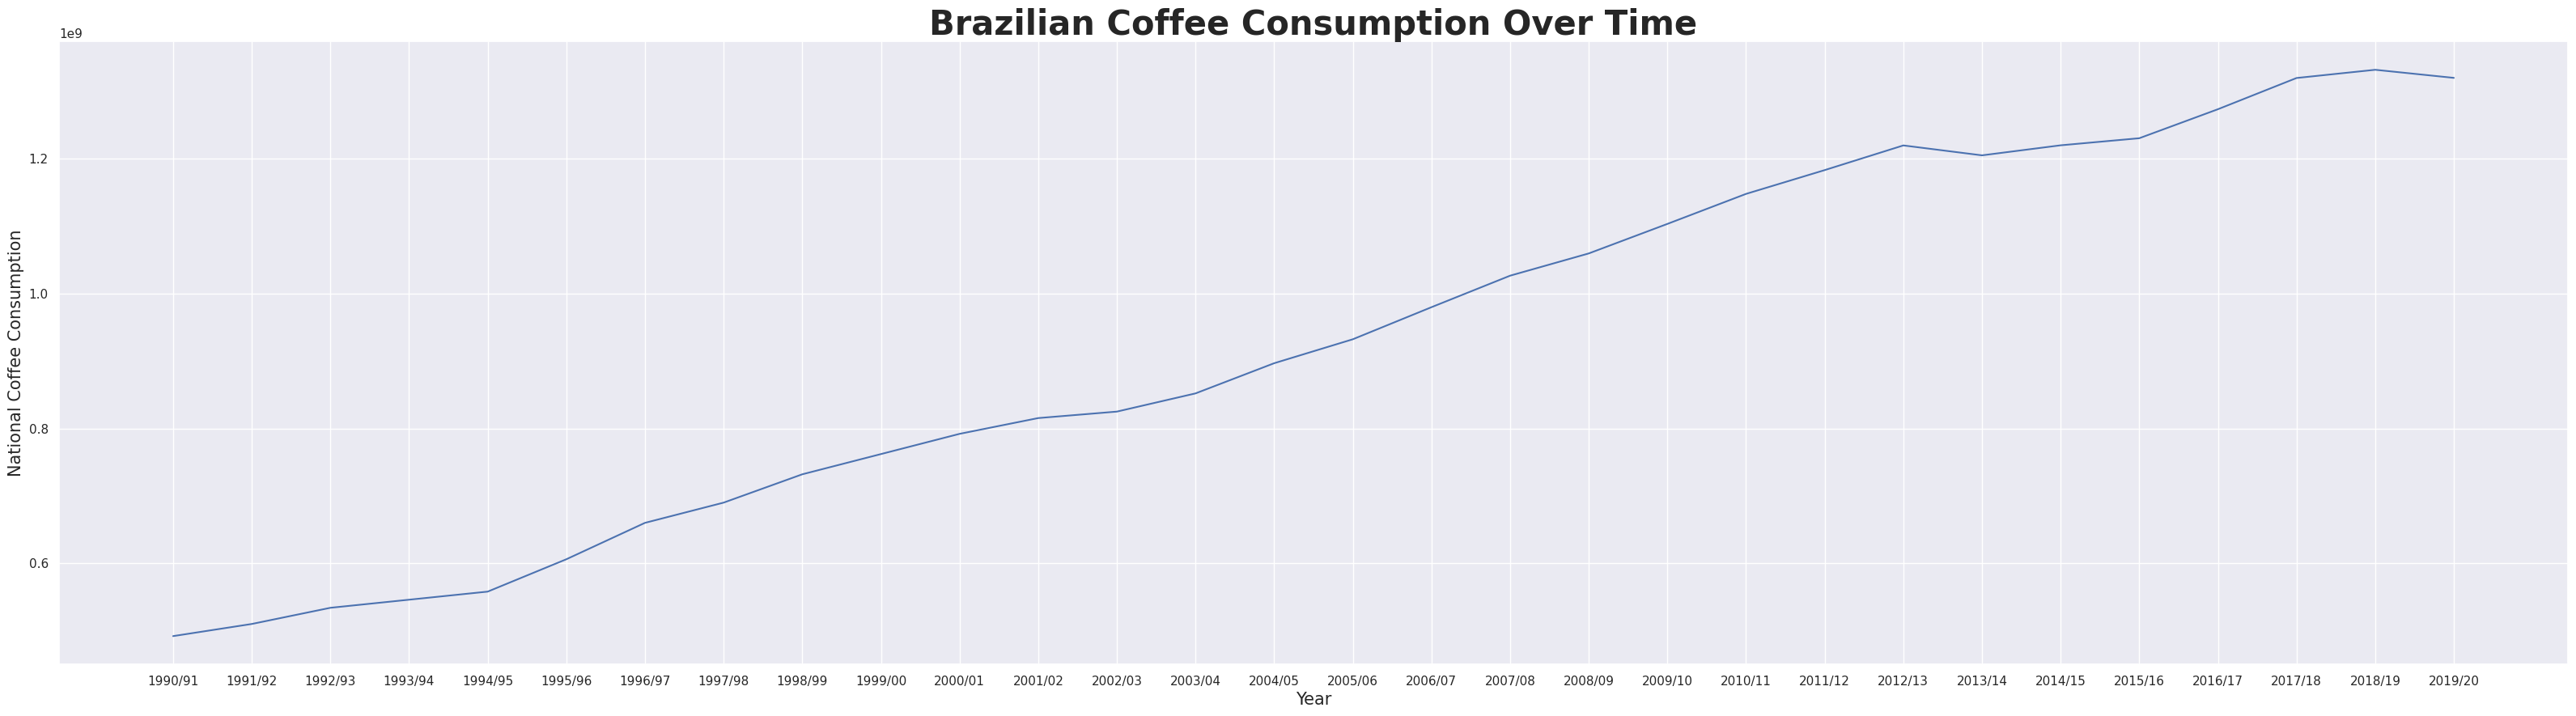

In [127]:
sns.set(rc={"figure.figsize":(40, 10)})
scatter = sns.lineplot(data=pivot, x='Year', y='Brazil')
scatter.set_title('Brazilian Coffee Consumption Over Time', fontdict={'size': 30, 'weight': 'bold'})
scatter.set_xlabel('Year', fontdict={'size': 15})
scatter.set_ylabel('National Coffee Consumption', fontdict={'size': 15})

In [115]:
Brazil

<Axes: xlabel='Year', ylabel='Brazil'>